Q1 NumPy – Array Operations
Write a program using NumPy to:
• Create a 2D array of size (5,5) with random integers between 10 and
100.
• Replace all even numbers in the array with -1.
• Find the row-wise and column-wise sum and mean.
• Flatten the array and sort the elements in descending order

In [1]:
import numpy as np

In [5]:
# Step 1: Create a 2D array of size (5, 5) with random integers between 10 and 100
array = np.random.randint(10, 101, size=(5, 5))
print("Array:")
print(array)

Array:
[[12 98 13 42 47]
 [29 23 31 47 47]
 [52 13 63 39 98]
 [83 13 86 22 61]
 [51 60 26 43 24]]


In [7]:
# Step 2: Replace all even numbers in the array with -1
array_with_replacement = np.where(array % 2 == 0, -1, array)
print("\nArray After Replacing Even Numbers with -1:")
print(array_with_replacement)


Array After Replacing Even Numbers with -1:
[[-1 -1 13 -1 47]
 [29 23 31 47 47]
 [-1 13 63 39 -1]
 [83 13 -1 -1 61]
 [51 -1 -1 43 -1]]


In [9]:
# Step 3: Find row-wise and column-wise sum and mean
row_sums = array_with_replacement.sum(axis=1)
col_sums = array_with_replacement.sum(axis=0)
row_means = array_with_replacement.mean(axis=1)
col_means = array_with_replacement.mean(axis=0)

In [11]:
print("\nRow-wise Sum:", row_sums)
print("Column-wise Sum:", col_sums)
print("Row-wise Mean:", row_means)
print("Column-wise Mean:", col_means)


Row-wise Sum: [ 57 177 113 155  91]
Column-wise Sum: [161  47 105 127 153]
Row-wise Mean: [11.4 35.4 22.6 31.  18.2]
Column-wise Mean: [32.2  9.4 21.  25.4 30.6]


In [13]:
# Step 4: Flatten the array and sort the elements in descending order
flattened_sorted = np.sort(array_with_replacement.flatten())[::-1]
print("\nFlattened Array Sorted in Descending Order:")
print(flattened_sorted)


Flattened Array Sorted in Descending Order:
[83 63 61 51 47 47 47 43 39 31 29 23 13 13 13 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


Q2 : Pandas – Data Handling & Analysis
Dataset to Use: Students Performance in Exams
Kaggle Link: https://www.kaggle.com/datasets/spscientist/studentsperformance-in-exams
Instructions:
• Download and load the dataset StudentsPerformance.csv using Pandas.
• Display basic statistics (mean, median, std) for math, reading  and
writing scores.
• Add a new column Overall_Score as the average of the three scores.
• Create a column Result:
o "Pass" if all scores are ≥ 40,
o otherwi
• Find the group-wise average scores by gender and parental level of
education.
• Visualize the average math score for each test preparation course
category using a bar plot.se "Fail".

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Step 1: Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

In [7]:
# Step 2: Display basic statistics for math, reading, and writing scores
print("Basic Statistics:")
print("Math Scores:")
print(data['math score'].describe())
print("\nReading Scores:")
print(data['reading score'].describe())
print("\nWriting Scores:")
print(data['writing score'].describe())

Basic Statistics:
Math Scores:
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

Reading Scores:
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

Writing Scores:
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64


In [9]:
# Step 3: Add a new column `Overall_Score` as the average of the three scores
data['Overall_Score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

In [11]:
# Step 4: Create a column `Result`
data['Result'] = data.apply(
    lambda row: 'Pass' if row['math score'] >= 40 and row['reading score'] >= 40 and row['writing score'] >= 40 else 'Fail',
    axis=1
)

In [13]:
# Step 5: Find the group-wise average scores by gender and parental level of education
grouped_averages = data.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score']].mean()
print("\nGroup-wise Average Scores by Gender and Parental Level of Education:")
print(grouped_averages)


Group-wise Average Scores by Gender and Parental Level of Education:
                                    math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
      

In [15]:
# Step 6: Visualize the average math score for each test preparation course category using a bar plot
average_math_scores = data.groupby('test preparation course')['math score'].mean()

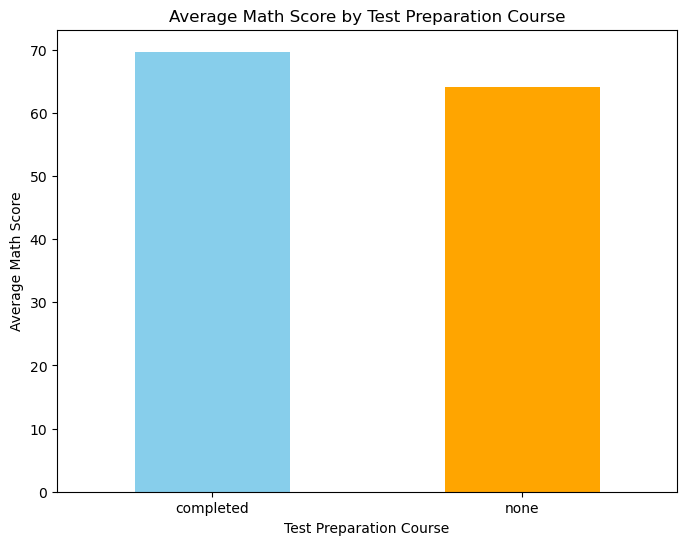

In [17]:
# Bar Plot
plt.figure(figsize=(8, 6))
average_math_scores.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average Math Score by Test Preparation Course")
plt.ylabel("Average Math Score")
plt.xlabel("Test Preparation Course")
plt.xticks(rotation=0)
plt.show()

Q3: SciPy – Optimization and Linear Algebra
Using SciPy:
• Solve the system of equations using scipy.linalg.solve:
3x+2y=16
4x−y=9
• Use scipy.optimize.minimize to minimize the function:
f(x)=(x−3)2+2
(Start with initial guess x = 0)
Show final optimized value and function plot using Matplotlib.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.optimize import minimize

In [21]:
# Part 1: Solve the system of equations
# Coefficients matrix and constants vector
A = np.array([[3, 2], [4, -1]])
b = np.array([16, 9])

# Solve the linear system
solution = solve(A, b)
print("Solution to the system of equations:")
print(f"x = {solution[0]:.2f}, y = {solution[1]:.2f}")

Solution to the system of equations:
x = 3.09, y = 3.36


In [23]:
# Part 2: Minimize the function f(x) = (x-3)^2 + 2
def f(x):
    return (x - 3)**2 + 2

# Initial guess
initial_guess = [0]

# Minimize the function
result = minimize(f, initial_guess)

# Extract optimized value
optimized_x = result.x[0]
optimized_f = result.fun

print("\nMinimization Results:")
print(f"Optimized x = {optimized_x:.2f}")
print(f"Minimum value of f(x) = {optimized_f:.2f}")


Minimization Results:
Optimized x = 3.00
Minimum value of f(x) = 2.00


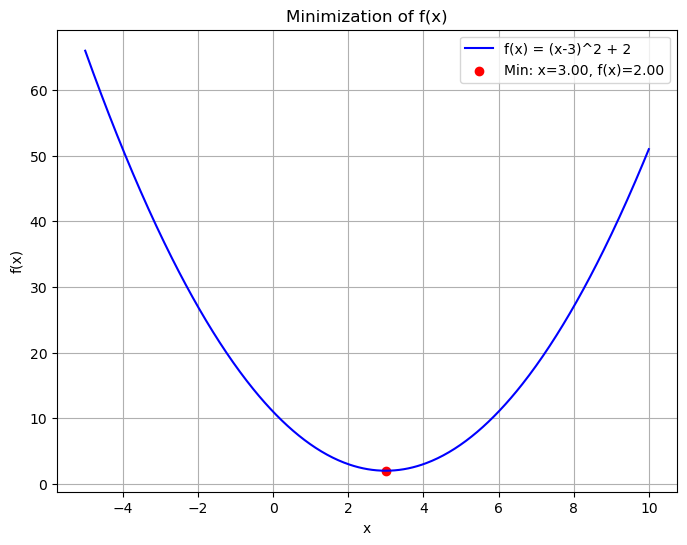

In [25]:
# Plot the function
x_vals = np.linspace(-5, 10, 500)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="f(x) = (x-3)^2 + 2", color="blue")
plt.scatter(optimized_x, optimized_f, color="red", label=f"Min: x={optimized_x:.2f}, f(x)={optimized_f:.2f}")
plt.title("Minimization of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Q4. Implement Logistic Regression and kNN on the Iris dataset (Scikit-learn).
Evaluate using accuracy score, confusion matrix, and classification report.

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [35]:
# k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [37]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic, target_names=iris.target_names))

Logistic Regression:
Accuracy: 0.91
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [39]:
# Evaluate kNN
print("\nk-Nearest Neighbors (kNN):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))


k-Nearest Neighbors (kNN):
Accuracy: 0.91
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

